In [1]:
#00. 패키지 호출
import pandas as pd 
import numpy as np 
import warnings 
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.linear_model import ElasticNet # 엘라스틱넷
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

#00-1. warning message ignore 
warnings.filterwarnings(action='ignore')

#00-2. 난수씨드값 지정하기.
np.random.seed(2021)

#00-3. 시각화 옵션 설정하기. 
%matplotlib inline

In [2]:
# load data
df_감말랭이 = pd.read_csv("C:/ken/elasticnet/감말랭이.csv")
df_감말랭이.head()

,date,PC1,PC2,감말랭이
0,2018-01-01,-3.719474,0.965108,2.862813
1,2018-01-02,-3.741912,0.888377,4.328310
2,2018-01-03,-4.074829,0.748572,5.545913
3,2018-01-04,-4.325838,0.235772,5.867105
4,2018-01-05,-3.772842,0.246325,4.414783


In [3]:
# 원본 보관하기.  
df_감말랭이_raw = df_감말랭이

# 날짜 컬럼 인덱스로 지정하기. 
df_감말랭이 = df_감말랭이.set_index('date')

# train, test 데이터셋을 연속적으로 분할하기. 
X_train = df_감말랭이.iloc[0:365,:-1]
y_train = df_감말랭이.iloc[0:365,-1]
X_test  = df_감말랭이.iloc[365:730,:-1]
y_test  = df_감말랭이.iloc[365:730,-1]

# 데이터셋 차원 확인하기.
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((365, 2), (365,), (365, 2), (365,))

In [4]:
# 모형 생성
model_elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
model_elastic.fit(X_train,y_train)
print(model_elastic.score(X_train,y_train))
print(model_elastic.score(X_test,y_test))

0.4129876272956259
0.268538879186201


In [9]:
model_elastic.get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

modelElastic = make_pipeline(StandardScaler(),ElasticNet())
param_value = {'elasticnet__alpha':[0.0001,0.01,1,2,3,4],}
gridSearch = GridSearchCV(modelElastic,param_grid = param_value,cv=10) # 교차검증, 파라미터 값 찾기
gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [0.0001, 0.01, 1, 2, 3, 4]})

In [12]:
gridSearch.best_params_ # 참고해서 alpha값을 다양하게 바꿔보기

{'elasticnet__alpha': 0.01}

In [13]:
gridSearch.best_score_

-6.063035599724539

In [14]:
# test 데이터셋으로 모형 예측 및 평가하기. 
#① R-squared
gscv_model_elastic_fit = gridSearch.best_estimator_
gscv_model_elastic_pred = gscv_model_elastic_fit.predict(X_test)
r2_score(y_test,gscv_model_elastic_pred)

0.2696033860815096

In [15]:
#② RMSE 
mse = mean_squared_error(y_test,gscv_model_elastic_pred)
rmse = np.sqrt(mse)
rmse

1.5111283952821069

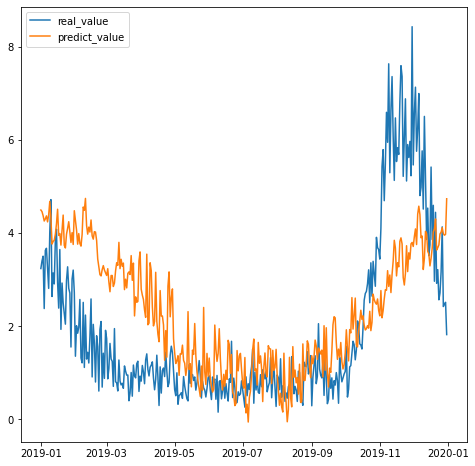

In [16]:
# 예측값 시각화하기. 
test_date = df_감말랭이_raw.iloc[365:730,0]
test_date = test_date.astype('str')
test_date = pd.to_datetime(test_date)
plt.figure(figsize=(8,8))
plt.plot(test_date, y_test, label='real_value')
plt.plot(test_date, gscv_model_elastic_pred, label='predict_value')
plt.legend(loc='upper left')
plt.show()